In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import tensorflow as tf

from tqdm.notebook import tqdm

from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Input
from tensorflow.keras.layers import Dropout, BatchNormalization, Activation
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy, MSE
from tensorflow.keras.datasets.mnist import load_data
import random

In [16]:
(x_train, y_train), (x_test, y_test)  = load_data()

In [4]:
# x_train = x_train.reshape(-1,28,28,1)
# x_train = x_train.astype('float32')
# x_train = x_train/255

In [44]:
height, width = 128, 128
def create_sample(x_train, y_train, height, width):
    zeros = np.zeros((height, width))
    num = 2
    len_train_set = x_train.shape[0]
    labels = []
    for i in range(num):
#         display(x_train.shape[1:])
        num_width, num_height = x_train.shape[1:]        
        x_shift = random.randint(num_width//2, width - num_width//2)
        y_shift =  random.randint(num_height//2, height - num_height//2)    
        ind = random.randint(0, len_train_set)
        labels.append((y_shift, x_shift, y_train[ind], num_width, num_height))
        labels = sorted(labels)
        zeros[y_shift-num_height//2:y_shift + num_height//2, x_shift - num_width//2: x_shift+num_width//2] = x_train[ind]
    return zeros, labels

In [46]:
data = create_sample(x_train=x_train, y_train=y_train, height=height, width=width)

[(65, 14, 5, 28, 28), (91, 44, 7, 28, 28), (103, 66, 3, 28, 28)]

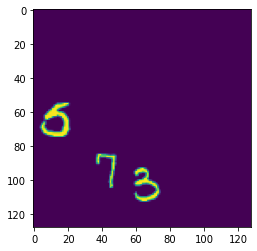

In [41]:
plt.imshow(data[0])
data[1]

In [48]:
data[1]

[(60, 83, 0, 28, 28), (79, 33, 4, 28, 28)]

In [43]:
inp = Input([128,128,1])
x = Conv2D(16, 3, padding='same', activation='relu')(inp)
x = MaxPool2D()(x)
x = Conv2D(32, 3, padding='same', activation='relu')(x)
x = MaxPool2D()(x)
x = Conv2D(64, 3, padding='same', activation='relu')(x)
x = MaxPool2D()(x)
x = Conv2D(128, 3, padding='same', activation='relu')(x)
x = MaxPool2D()(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
out1 = Dense(10, activation='softmax')(x)
out2 = Dense(4, activation='linear')(x)
model = Model(inputs=inp, outputs=[out1, out2])
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 128, 128, 16) 160         input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)  (None, 64, 64, 16)   0           conv2d_3[0][0]                   
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 64, 64, 32)   4640        max_pooling2d_3[0][0]            
____________________________________________________________________________________________

In [50]:
x_samples = []
clsf_samples = []
reg_samples = []
for i in range(5000):
    data = create_sample(x_train=x_train, y_train=y_train, height=height, width=width)
    img = data[0]
    clsf = (data[1][0][2], data[1][1][2])
    reg = (data[1][0][:2] + data[1][0][3:], data[1][1][:2] + data[1][1][3:])
    x_samples.append(img)
    clsf_samples.append(clsf)
    reg_samples.append(reg)   
    
display(reg)


((99, 18, 28, 28), (106, 54, 28, 28))

In [ ]:
d_set.shape